# Felicia Pong You Xin_Exercise Week 4 

1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

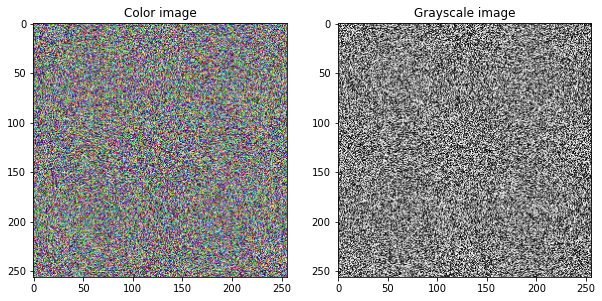

In [2]:
#random noise color and grayscaleimage
img_color = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
img_grayscale = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

plt.figure(figsize=(10, 5))

#random noise color image
plt.subplot(1, 2, 1)
plt.title('Color image')
plt.imshow(img_color)
plt.axis('on')

#random noise grayscale image
plt.subplot(1, 2, 2)
plt.title('Grayscale image')
plt.imshow(img_grayscale, cmap='gray')
plt.axis('on')

plt.show()

2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```

In [3]:
import cv2 as cv

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    img_copy = img.copy()
    height, width = img.shape[:2]
    
    # M and N are basically number of pixels per patch
    M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N
            
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    return img_copy

    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
    img = cv.imread('images/dog.jfif')
    crop_grid(img, 3, 2, (0, 255, 0))

3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

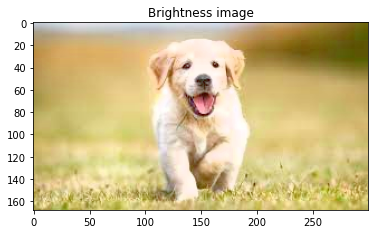

In [5]:
#Method 1:

img = cv.imread('dog.jfif')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)

#increase the brightness by adding a value to v
v_new = cv.add(v, 50)

transform = cv.merge((h, s, v_new))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

#display image
plt.imshow(cv.cvtColor(transform_display, cv.COLOR_BGR2RGB))
plt.title('Brightness image')
plt.axis('on')
plt.show()

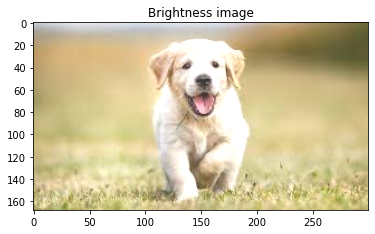

In [6]:
#Method 2: 

img = cv.imread('dog.jfif')
img_float = img.astype(np.float32)

#increase brightness by adding a constant value
brightness = 50
bright_img = cv.convertScaleAbs(img_float + brightness)

#display image
plt.imshow(cv.cvtColor(bright_img, cv.COLOR_BGR2RGB))
plt.title('Brightness image')
plt.axis('on')
plt.show()

4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

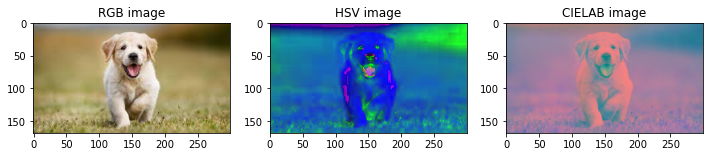

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('dog.jfif')

#RGB 
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#CIELAB
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

#display image
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('HSV image')
plt.imshow(img_hsv)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('CIELAB image')
plt.imshow(img_lab)
plt.axis('on')

plt.show()